In [1]:
import sys
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np  

用于在 Jupyter Notebook 内部显示图片

In [2]:
%matplotlib inline  

# 数字图像处理（1）

## 读取、写入

`retVal = cv2.imread( file_name_str [, flags] )`用于读取静态图像：
- `retVal`：若读取到图像，返回一个矩阵，否则返回`None`；
- `[, flag]`用于标记读取文件类型：
    - `cv2.IMREAD_GRAYSCALE`：将图片调整为单通道灰度图像；
    - `cv2.IMREAD_COLOR`：将图片调整为`BGR`格式的图像（默认）；
        - 由于`matplotlib.pyplot`显示为`RGB`色彩，所以要想无色差展示需要做如下处理，一般也会进行封装：
        ```python
            def readRGB(filename: str):
                # 读入一个 RGB 图像
                blue, green, red = cv2.split(
                    cv2.imread(filename, cv2.IMREAD_COLOR)
                )
                return cv2.merge((red, green, blue))
        ```
`retVal = cv2.imwrite( file_name, img [, params] )`用于保存图像：
- `retVal`：是一个布尔类型，若保存成功则返回`True`；
- `file_name`：保存完整路径名，包括扩展名；
- `img`：待保存图像；

In [2]:
def readRGB(filename: str):
    # 读入一个 RGB 图像
    blue, green, red = cv2.split( cv2.imread(filename) )
    return cv2.merge( (red, green, blue) )

def readGRAY(filename: str):
    # 读入一个单通道灰度图
    return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

## 显示图像

In [3]:
def show(pic_1, pic_2=None, pic_3=None, msg_1="Ori", msg_2="PIC_2", msg_3="PIC_3"):
    # 未优化
    # 传入图片均为 灰度图像
    if pic_3 is None:
        if pic_2 is None:
            plt.figure(figsize=(10, 10))
            plt.imshow(pic_1, cmap='gray')
            plt.title(msg_1)
            plt.xticks([])
            plt.yticks([])
            return
        else:
            plt.figure(figsize=(10, 10))
            plt.subplot(121)
            plt.imshow(pic_1, cmap='gray')
            plt.title(msg_1)
            plt.xticks([])
            plt.yticks([])
            plt.subplot(122)
            plt.imshow(pic_2, cmap='gray')
            plt.title(msg_2)
            plt.xticks([])
            plt.yticks([])
    else:
        plt.figure(figsize=(10, 10))
        plt.subplot(131)
        plt.imshow(pic_1, cmap='gray')
        plt.title(msg_1)
        plt.xticks([])
        plt.yticks([])
        plt.subplot(132)
        plt.imshow(pic_2, cmap='gray')
        plt.title(msg_2)
        plt.xticks([])
        plt.yticks([])
        plt.subplot(133)
        plt.imshow(pic_3, cmap='gray')
        plt.title(msg_3)
        plt.xticks([])
        plt.yticks([])
    #plt.savefig('CV_TEST.png', dpi=500)

### 【本文所有图片用例】
> 为节省内存，统一在此读取，若日后取用，请灵活使用：`Img_new = Img.copy()`函数

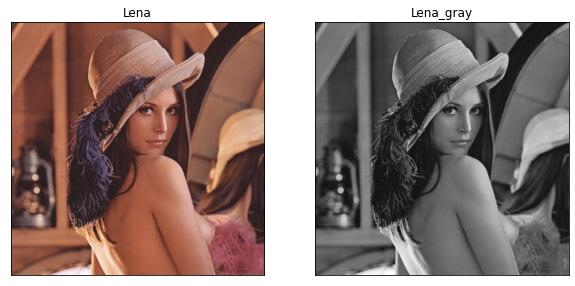

In [4]:
lena = readRGB('lena.png')
lena_gray = readGRAY('lena.png')
show(lena, lena_gray, msg_1="Lena", msg_2="Lena_gray")

## `numpy`的基本操作

`numpy.zeros ( (row, col), dtype = np.uint8 )`可以生成一个元素都是$0$的数组，并且可以直接通过索引进行访问

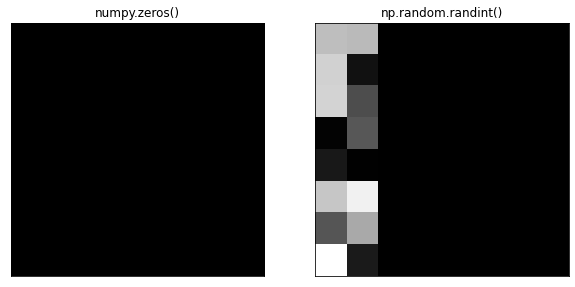

In [5]:
black = np.zeros( (8, 8), dtype=np.uint8 )
rand_8 = np.random.randint(0, 255, (8, 8), dtype=np.uint8)

rand_8[:, 2:] = 0


show(black, rand_8, msg_1 = "numpy.zeros()", msg_2 = "np.random.randint()")

使用`numpy.array`提供的`item()`和`itemset()`访问和修改像素值可以大幅提高处理速度：
- `img.item( (i, j) )`：返回`img[i][j]`位置上的像素值；
- `img.itemset( (i, j), num )`：将`img[i][j]`位置上的像素值修改为`num`；

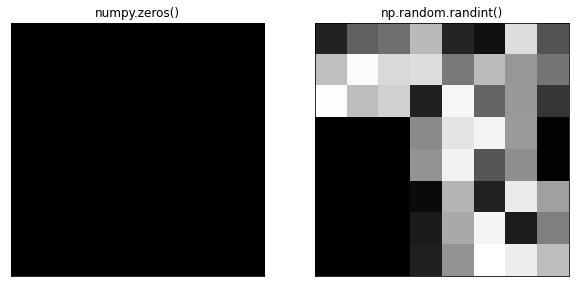

In [6]:
rand_8 = np.random.randint(0, 255, (8, 8), dtype=np.uint8)

for i in range(3, 8):
    for j in range(0, 3):
        rand_8.itemset((i, j), 0)

show(black, rand_8, msg_1 = "numpy.zeros()", msg_2 = "np.random.randint()")

## 简单的图像运算
使用加号运算符 $+$ 对图像进行求和的时候，遵循如下公式：
$$
A+B=mod(A+B,\  256)
$$
使用`cv2.add()`函数的时候，遵循如下规则：
```python
Result = cv2.add(A + B)
```
$$
Result = max\{A+B,\ 255\}
$$

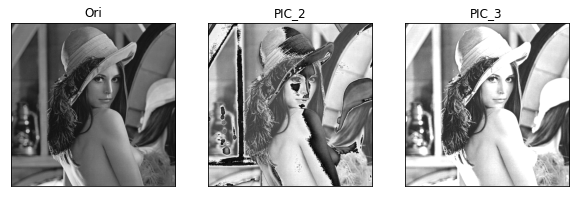

In [7]:
lena_plus = lena_gray + lena_gray
lena_add = cv2.add(lena_gray, lena_gray)

show( lena_gray, lena_plus, lena_add )

`OpenCV`同样提供了图像加权和的函数：
```python
Result = cv2.addWeight( src_1, alpha, src_2, beta, gamma)
```
$$
Result = src_1\times\alpha+src_2\times\beta+\gamma
$$

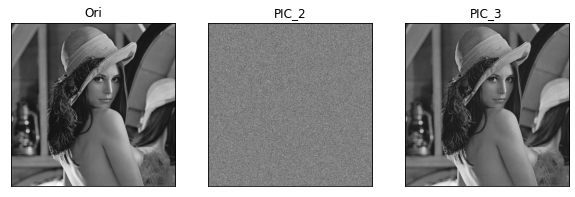

In [8]:
rand = np.random.randint(0, 255, lena_gray.shape, dtype=np.uint8)
lena_rand = cv2.addWeighted(lena_gray, 0.9, rand, 0.1, 0)

show(
    lena_gray, rand, lena_rand
)

# 数字图像处理（2）

## 灰度直方图

```python
cv2.calcHist( img, channels, mask, histSize, ranges[, hist[, accumulate ]] ) -> hist
Img_hist = cv2.calcHist( [Img], [0], None, [256], [0, 255] )
```
- `img`，输入图像的数组，这些图像要有相同大大小，相同的深度，用方括号包起来；
- `channels`，要计算直方图的通道个数；
- `mask`，可选的掩码，不使用时可设为空(处理整个图像)。要和输入图像具有相同的大小，在进行直方图计算的时候，只会统计该掩码不为0的对应像素
- `histSize`，直方图每个维度的大小
- `ranges`，直方图每个维度要统计的灰度级的范围
- `accumulate`，累积标志，默认值为false。

---
以下实现方法通过便利每一个二维数组中的像素值，获得灰度向量；

In [9]:
def my_calcHist(pic):
    row, col = pic.shape
    y = np.zeros((256, ))
    for i in range(row):
        for j in range(col):
            y[pic[i][j] - 1] += 1
    return y

In [10]:
lena_gray_hist_my = my_calcHist(lena_gray) # Lena Grayscale on my_calcHist()
rand_hist_my = my_calcHist(rand) # Random Noise on my_calcHist()
lena_rand_hist_my = my_calcHist(lena_rand) # Lena with Noise on my_calcHist()
lena_rand_hist_cv = cv2.calcHist([lena_rand], [0], None, [256], [0, 256]) # Lena with Noise on cv2.calcHist()

Text(0.5, 1.0, 'Lena with Noise on cv2.calcHist()')

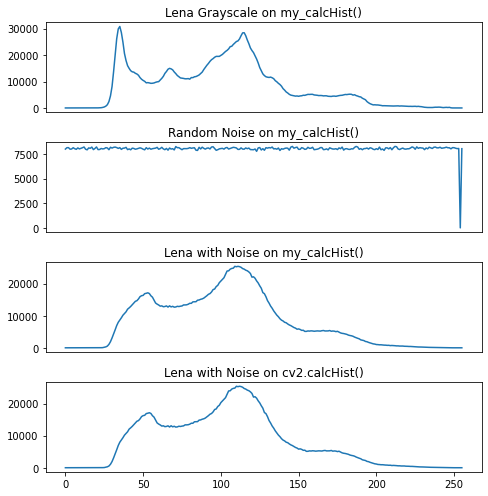

In [11]:
plt.figure(figsize=(7, 7))

plt.subplot(411); plt.tight_layout()
plt.plot( lena_gray_hist_my )
plt.title('Lena Grayscale on my_calcHist()'); plt.xticks([])
        
plt.subplot(412); plt.tight_layout()
plt.plot(rand_hist_my)
plt.title('Random Noise on my_calcHist()'); plt.xticks([])

plt.subplot(413); plt.tight_layout()
plt.plot(lena_rand_hist_my)
plt.title('Lena with Noise on my_calcHist()'); plt.xticks([])

plt.subplot(414); plt.tight_layout()
plt.plot(lena_rand_hist_cv)
plt.title('Lena with Noise on cv2.calcHist()')

In [12]:
from ipywidgets import interact
import ipywidgets as widgets

# 如有需要请直接修改传入的 file_name:str
# 动态展示一条横线上的灰度值变化

test = readGRAY('lena.png')
row, col = test.shape
width = 3

def f(x):
    y = test[x].copy()
    img = test.copy()
    
    mask = np.zeros((row, col), dtype=np.uint8)
    mask[x - width : x + width, :] = 255
    
    img = cv2.add(mask, img)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(212)
    plt.plot(y); plt.xticks([0, col - 1]); plt.yticks([0, 255]); plt.title("Gray Value")

    plt.subplot(211)
    plt.imshow(img, cmap='gray'); plt.xticks([]); plt.yticks([]); plt.title("Selected Line")
    return

interact(f, x = widgets.IntSlider(min=width, max=row-width, step=1, value=int(np.divide(row, 2))))

interactive(children=(IntSlider(value=716, description='x', max=1429, min=3), Output()), _dom_classes=('widget…

<function __main__.f(x)>

## 阈值处理

### 全局阈值 - 灰度图像的自动阈值分割（Otsu 法）

假设一副图像由前景色和背景色组成，通过统计学的方法来选取一个阈值，使得这个阈值可以将前景色和背景色尽可能的分开。或者更准确的说是在某种判据下最优。与数理统计领域的 `fisher` 线性判别算法其实是等价的。

`otsu`算法中这个判据就是最大类间方差 (intra-class variance or the variance within the class)。

假设灰度值的均值是 `M`，现在任意选取一个灰度值 `t`，则可以将这个直方图分成前后两部分。我们称这两部分分别为 `A` 和 `B`。对应的就是前景色和背景色。这两部分各自的灰度均值成为 $M_A$ 和 $M_B$。 
`A` 部分里的像素数占总像素数的比例记作 $P_A$，`B`部分里的像素数占总像素数的比例记作 $P_B$。`Nobuyuki Otsu` 给出的类间方差定义为： 
$$
ICV=P_A\times(M_A−M)^2+P_B\times (M_B−M)^2
$$
那么这个最佳的阈值 就是使得 最大的那个值。 

In [13]:
def cal(pic, T):
    row, col = pic.shape
    high = low = 0
    n_high = n_low = 0
    # 遍历图像，大于阈值者，计算像素值和、计数值增一
    for i in range (row):
        for j in range (col):
            if pic.item(i, j) > T:
                high += pic.item(i, j)
                n_high += 1
            else:
                low += pic.item(i, j)
                n_low += 1
    # 平均像素灰度值，像素和 / 计数
    m1 = np.int32(high / n_high)
    m2 = np.int32(low / n_low)
    return np.int32((m1 + m2) / 2)

def ohta(img, T = 127, mode:int=0):
    # 两种模式：mode == 0时，图片中较暗部分置黑
    row, col = img.shape
    img1 = np.zeros((row, col), np.uint8)
    T0 = T
    T1 = cal(img, T0)
    for k in range (100):   # 迭代次数为经验值，可据实际情况选定
        if abs(T1 - T0) == 0:   # 若新阈值减旧阈值差值为零，则为二值图最佳阈值
            for i in range (row):
                for j in range (col):
                    if img[i, j] > T1:
                        if mode == 1:
                            img1.itemset(i, j, 0)
                        else:
                            img1.itemset(i, j, 255)
                    else:
                        if mode == 1:
                            img1.itemset(i, j, 255)
                        else:
                            img1.itemset(i, j, 0)
            break
        else:
            T2 = cal(img, T1)
            T0 = T1
            T1 = T2   # 变量转换，保证if条件为新阈值减旧阈值
    return img1

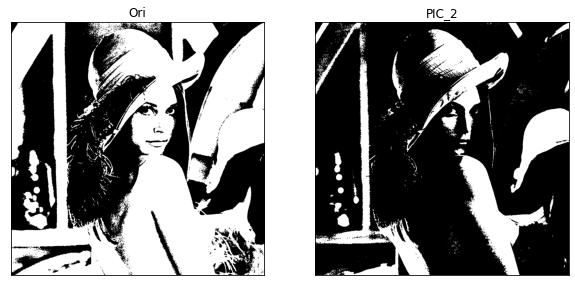

In [14]:
lena_bin_otsu = ohta(lena_gray)
lena_bin_cv = cv2.threshold(lena_gray, 127, 255, cv2.THRESH_BINARY)[1]
show(lena_bin_otsu, lena_bin_cv)

### 局部阈值【此部分未经过优化】

通过一个小滑窗`W`估计局部阈值
$$
T_w = \mu_W + k\dot \sigma_W\,\,,k\in[-10,\,0]\,user\,defined
$$

In [15]:
def window(gray, i, j, win = (5, 5), k = 0.5):
    row, col = gray.shape
    
    if i >= row or j >= col:
        # print("Error Value")
        return
    
    wid = (int)(win[0] / 2)
    len = (int)(win[1] / 2)
    
    from_r = (i - wid) if (i - wid) >= 0 else 0
    to_r = (i + wid) if (i + wid) < (row - 1) else (row - 1)
    from_c = (j - len) if (j - len) >= 0 else 0
    to_c = (j + len) if (j + len) < (col - 1) else (col - 1)
    
    wid = to_r - from_r + 1
    len = to_c - from_c + 1
    
    temp = wid * len
    
    mean = 0
    for i in range(from_r, to_r + 1):
        for j in range(from_c, to_c + 1):
            # print(" i, j", i, j)
            mean += gray[i][j]
    mean /= temp
    s = 0
    count = 0
    for i in range(from_r, to_r + 1):
        for j in range(from_c, to_c + 1):
            count += 1
            s += math.pow(gray[i][j] - mean, 2)
    s = math.sqrt(s / temp)
    return mean + k * s

def niblack(gray, k = 0.5, win = (5, 5)):
    row, col = gray.shape
    img = np.zeros((row, col), np.uint8)
    
    for i in range(row - 1):
        for j in range(col):
            T = window(gray, i, j, win, k)
            if gray[i][j] > T:
                img.itemset(i, j, 0)
            else:
                img.itemset(i, j, 255)
    return img

In [16]:
auto_gray = readGRAY('auto.png')
auto_otsu = ohta(auto_gray)
auto_niblack = niblack(auto_gray)

show(auto_gray, auto_otsu, auto_niblack)

KeyboardInterrupt: 

In [ ]:
cell_gray = readGRAY('data/01_cell.png')
cell_otsu = ohta(cell_gray, mode=1)
cell_niblack = niblack(cell_gray)

show(cell_gray, cell_otsu, cell_niblack)

改进的版本可抑制文档二值化的背景噪音[Sauvola'00]
$$
T_W=\mu_W[1+k\dot(\frac{\sigma_W}{R}-1)]
$$
R
Sauvola算法的输入是灰度图像，它以当前像素点为中心，根据当前像素点邻域内的灰度均值与标准方差来动态计算该像素点的阈值。

假定当前像素点的坐标为(x,y)，以该点为中心的领域为r*r，g(x,y)表示(x,y)处的灰度值，Sauvola算法的步骤为：

In [ ]:
def sauvola(gray, R = 128, k = 0.5, win = (5, 5)):
    row, col = gray.shape
    img = np.zeros((row, col), np.uint8)
    
    count = 0
    
    for i in range(row - 1):
        if count == 80:
            print(i/(row - 1))
            count = 0
        count += 1
        for j in range(col):
            T = window(gray, i, j, win, k)
            if gray[i][j] > T:
                img[i][j] = 0
            else:
                img[i][j] = 255
    return img

In [ ]:
# cell_gray = readGRAY('data/01_cell.png')
# cell_copy = cell_gray.copy()
# cell_sauvola = sauvola(cell_gray, k=0.25, win=(31, 31))
# show(cell_copy, cell_otsu, cell_sauvola)

### `OpenCV`阈值函数

## 形态学操作

In [ ]:
phone_ori = readGRAY('data/01_phone.png')
phone_bin = ohta(phone_ori, 127)
show(phone_ori, phone_bin)

使用阈值图像减去腐蚀，可以将元素的边缘勾勒出来。

In [ ]:
kernel = np.ones((5, 5), dtype=np.uint8)
phone_close = cv2.morphologyEx(phone_bin, cv2.MORPH_CLOSE, kernel)
phone_edge =  phone_bin - cv2.erode(phone_close, kernel)
show(phone_bin, phone_close, phone_edge)

In [ ]:
def draw_edge(pic):
    pic_ori = pic.copy()
    pic_gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    pic_bin =  ohta(pic_gray, 127)
    kernel = np.ones((5, 5), dtype=np.uint8)
    pic_close = cv2.morphologyEx(
        pic_bin,
        cv2.MORPH_CLOSE,
        kernel
    )
    pic_edge = pic_bin - cv2.erode(pic_close, kernel)

    row, col, dim= pic_ori.shape
    for i in range(row):
        for j in range(col):
            if pic_edge[i][j] == 255:
                pic_ori[i][j] = [255, 0, 0]
    # 绘制图像
    while True:
        plt.subplot(231)
        plt.imshow(pic)
        plt.title("Original")
        plt.xticks([])
        plt.yticks([])
        plt.subplot(232)
        plt.imshow(pic_bin, cmap='gray')
        plt.title("Binary")
        plt.xticks([])
        plt.yticks([])
        plt.subplot(233)
        plt.imshow(pic_close, cmap='gray')
        plt.title("Close")
        plt.xticks([])
        plt.yticks([])
        plt.subplot(234)
        plt.imshow(pic_edge, cmap='gray')
        plt.title("Edge")
        plt.xticks([])
        plt.yticks([])
        plt.subplot(235)
        plt.imshow(pic_ori, cmap='gray')
        plt.title("Drawed")
        plt.xticks([])
        plt.yticks([])
        break

    plt.savefig('Drawed.png', dpi=500)

test = readRGB('data/01_phone.png')
draw_edge(test)

In [ ]:
def self_dilation(pic, win_size):
    # 传入一个 RGB 彩图
    pic_ori = pic.copy()    # 复制一个彩色的原图
    pic_gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    pic_bin =  ohta(pic_gray, 127)
    if win_size % 2 == 0:
        win_size += 1

    kernel = np.zeros((win_size, win_size), dtype=np.uint8)

    for count in range(win_size):
        kernel[count][int(win_size / 2)] = 1
        kernel[int(win_size / 2)][count] = 1

    # 测试 模式 是否通过
    # plt.imshow(kernel)
    # print(kernel)

    row, col = pic_bin.shape
    img = np.zeros((row, col), np.uint8)
    step = int(win_size / 2)
    for i in range(step, row - step):
        for j in range(step, col - step):
            # todo
            for n in range(win_size):
                for m in range(win_size):
                    if kernel[n][m] == 1 and pic_bin[i - step + n][j - step + m] != 0:
                        img[i][j] = 255
    # show(pic_ori, pic_bin, img)
    return img
test = readRGB('data/01_phone.png')
draw_edge(test)

In [ ]:
def self_erosion(pic, win_size):
    # 传入一个 RGB 彩图
    pic_ori = pic.copy()    # 复制一个彩色的原图
    pic_gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    pic_bin =  ohta(pic_gray, 127)
    if win_size % 2 == 0:
        win_size += 1

    kernel = np.zeros((win_size, win_size), dtype=np.uint8)

    for count in range(win_size):
        kernel[count][int(win_size / 2)] = 1
        kernel[int(win_size / 2)][count] = 1

    # 测试 模式 是否通过
    # plt.imshow(kernel)
    # print(kernel)

    row, col = pic_bin.shape
    img = np.zeros((row, col), np.uint8)
    step = int(win_size / 2)
    for i in range(step, row - step):
        for j in range(step, col - step):
            # todo
            count = 0
            for n in range(win_size):
                for m in range(win_size):

                    if kernel[n][m] == 1 and pic_bin[i - step + n][j - step + m] == 255:
                        count += 1
            if count == win_size * 2 - 1:
                img[i][j] = 255
            else:
                img[i][j] = 0
    # show(pic_ori, pic_bin, img)
    return img

In [ ]:
# 绘制 OpenCV 与 我的函数的 膨胀、腐蚀 的对比
while True:
    ori = readRGB('data/01_phone.png')
    gray = cv2.cvtColor(ori, cv2.COLOR_BGR2GRAY)
    bin = ohta(gray, 128)

    plt.subplot(231)
    plt.imshow(ori, cmap="gray")
    plt.title("Gray Ori")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(232)
    erosion = self_erosion(ori, 7)
    plt.imshow(erosion, cmap="gray")
    plt.title("Erosion")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(233)
    dilation = self_dilation(ori, 7)
    plt.imshow(dilation, cmap="gray")
    plt.title("Dilation")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(235)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    off_err = cv2.erode(bin, kernel)
    plt.imshow(off_err, cmap="gray")
    plt.title("OpenCV Erosion")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(236)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    off_di = cv2.dilate(bin, kernel)
    plt.imshow(off_di, cmap="gray")
    plt.title("OpenCV Dilation")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(234)
    plt.imshow(bin, cmap="gray")
    plt.title("Ohta")
    plt.xticks([])
    plt.yticks([])

    plt.savefig("Compare.png", dpi=500)
    break

## 图像平滑处理

### 噪声
- `Salt & pepper` 噪声：随机出现的**黑、白**像素；
- 脉冲噪声：随机出现的白色像素；
- 高斯噪声：服从正态分布的像素点；

#### 椒盐噪声

In [ ]:
def my_noise_salt(pic):
    row, col = pic.shape
    img = pic.copy()
    num = np.divide(col, 3)
    for i in range(row):
        random_white = np.random.randint(0, col - 1, (1, int(num)))
        random_black = np.random.randint(0, col - 1, (1, int(num)))
        for j in range(int(num)):
            img.itemset(i, random_white.item(j), 255)
        for j in range(int(num)):
            img.itemset(i, random_black.item(j), 0)
    return img

lena_salt = my_noise_salt(lena_gray); show(lena_gray, lena_salt) # test

In [ ]:
test = lena_salt.copy()
row, col = test.shape
width = 3

def f(x):
    y = test[x].copy()
    img = test.copy()
    
    mask = np.zeros((row, col), dtype=np.uint8)
    mask[x - width : x + width, :] = 255
    
    img = cv2.add(mask, img)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(212)
    plt.scatter(range(col), y); plt.xticks([0, col - 1]); plt.yticks([0, 255]); plt.title("Gray Value")

    plt.subplot(211)
    plt.imshow(img, cmap='gray'); plt.xticks([]); plt.yticks([]); plt.title("Selected Line")
    return

interact(f, x = widgets.IntSlider(min=width, max=row-width, step=1, value=int(np.divide(row, 2))))

#### 脉冲噪声

In [ ]:
def my_noise_impulse(pic):
    row, col = pic.shape
    img = pic.copy()
    rand_mat = np.random.randint(0, 2, (row, col), dtype=np.uint8)
    for i in range(row):
        for j in range(col):
            if rand_mat.item(i, j) == 1:
                img.itemset(i, j, 255)
    return img

lena_imp = my_noise_impulse(lena_gray); show(lena_gray, lena_imp) # test

In [ ]:
def my_noise_impulse_2(pic):
    row, col = pic.shape
    rand_mat = np.random.choice([0, 255], (row, col))
    return pic + rand_mat

lena_imp_2 = my_noise_impulse(lena_gray); show(lena_imp, lena_imp_2) # test

In [ ]:
test = lena_imp.copy()
row, col = test.shape
width = 3

def f(x):
    y = test[x].copy()
    img = test.copy()
    
    mask = np.zeros((row, col), dtype=np.uint8)
    mask[x - width : x + width, :] = 255
    
    img = cv2.add(mask, img)
    
    plt.figure(figsize=(10, 10))
    plt.subplot(212)
    plt.scatter(range(col), y); plt.xticks([0, col - 1]); plt.yticks([0, 255]); plt.title("Gray Value")

    plt.subplot(211)
    plt.imshow(img, cmap='gray'); plt.xticks([]); plt.yticks([]); plt.title("Implulse Noise")
    return

interact(f, x = widgets.IntSlider(min=width, max=row-width, step=1, value=int(np.divide(row, 2))))

#### 高斯噪声

In [ ]:
def my_noise_gaussian(pic, mu, sigma, k):
    row, col = pic.shape
    img = pic.copy()
    
    for i in range(row):
        for j in range(col):
            
            rand = np.random.randn()
            noise = mu + np.multiply(rand, sigma)
            noise = k * noise
            
            temp = pic[i][j] + noise
            
            if temp > 255:
                temp = 255
            elif temp < 0:
                temp = 0
                
            img[i][j] = temp
    return img

lena_gauss = my_noise_gaussian(lena_gray, 0, 1, 64); show(lena_gray, lena_gauss) # test

In [ ]:
show(lena_salt, lena_imp, lena_gauss, "Salt Noise", "Impulse Noise", "Gaussian Noise")

In [ ]:
y_1 = lena_gray[716]
y_2 = lena_salt[716]
y_3 = lena_imp[716]
y_4 = lena_gauss[716]
hist_list = [y_1, y_2, y_3, y_4]
legend_list = ["Lena Grayscale", "Salt Noise", "Impulse Noise", "Gaussian Noise"]
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(4, 1, i + 1)
    plt.plot(hist_list[i]); plt.title(legend_list[i])
    if i != 3:
        plt.xticks([]);
# lena_gray
# lena_salt
# lena_imp
# lena_gauss

### 均值滤波

In [ ]:
def filter_mean(pic, winsize):
    if winsize % 2 != 1:
        print("Windows size must be odd number.")
        return
    step = int(winsize / 2)
    row, col = pic.shape
    row_i, col_i = (row - winsize + 1, col - winsize + 1)
    Img = np.zeros((row_i, col_i), dtype=np.uint8)
    
    for i in range(step , row - step ):
        for j in range(step , col - step ):
            temp = pic[(i - step): (i + step + 1), (j - step ):( j + step + 1)]
            
            # 窗口操作如下
            sum = np.int32(np.sum(temp))
            mean = np.uint8(sum / (winsize*winsize))
            Img.itemset(i - step, j - step, mean)
            # print(i, j, " ", i - step, i + step, " ", j - step, j + step, " ", pic[i][j], " ", sum, mean)
    return Img

In [ ]:
lena_noise = readGRAY('lena_noise.png')
lena_noise_mean = filter_mean(lena_noise, 5)
show(lena_noise, lena_noise_mean)

### 方框滤波

### 高斯滤波

In [ ]:
kernel_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 1, 2, 1, -1],
    [-1, 3, 4, 2, -1],
    [-1, 1, 2, 1, -1],
    [-1, -1, -1, -1, -1]
])

dst = cv2.filter2D( src=lena_noise, ddepth=-1, kernel=kernel_5x5 , anchor=(-1, -1))
show(lena_noise, dst)

In [ ]:
kernel_5x5 = np.array([
    [1, 2, 1],
    [2, 8, 2],
    [1, 2, 1]
])

kernel_5x5 = kernel_5x5 / np.sum(kernel_5x5)

dst = cv2.filter2D( src=lena_noise, ddepth=-1, kernel=kernel_5x5 , anchor=(-1, -1))
show(lena_noise, dst)

### 中值滤波

### 双边滤波

### 2D滤波

# 结构化提取_Structure Extraction

# 颜色_Color

# 识别